In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [15]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [16]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [17]:
# from keras.datasets import mnist
 
# # Load pre-shuffled MNIST data into train and test sets
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

In [18]:
# print (X_train.shape)
# # (60000, 28, 28)

(60000, 28, 28)


In [20]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
train_images.shape

(60000, 28, 28)

In [24]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

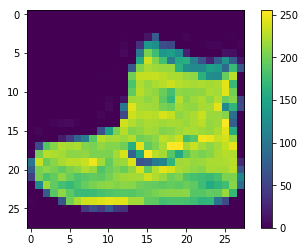

In [25]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [26]:
train_images = train_images / 255.0

test_images = test_images / 255.0

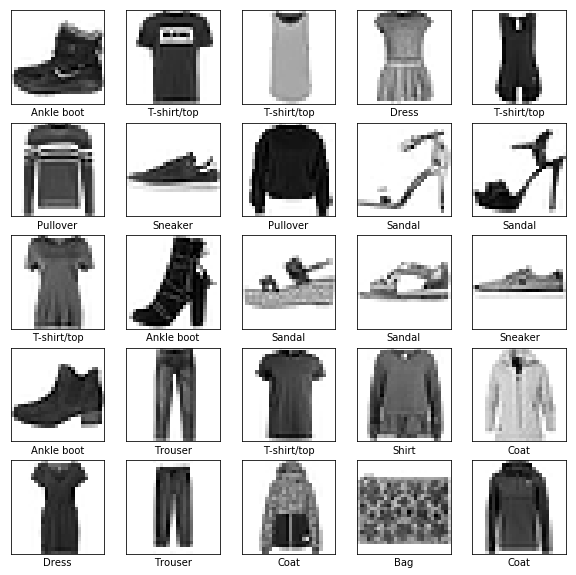

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2803 - acc: 0.8956
Epoch 2/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2672 - acc: 0.9005
Epoch 3/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2575 - acc: 0.9045
Epoch 4/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2475 - acc: 0.9066
Epoch 5/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2387 - acc: 0.9103


In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 16us/sample - loss: 0.3417 - acc: 0.8815
Test accuracy: 0.8815


In [35]:
predictions = model.predict(test_images)

In [36]:
predictions[0]

array([3.1119021e-07, 1.3615339e-11, 8.4647428e-10, 7.3386484e-09,
       7.9924824e-08, 3.1954634e-03, 2.8529794e-07, 2.0971717e-01,
       1.7340334e-06, 7.8708500e-01], dtype=float32)

In [37]:
np.argmax(predictions[0])

9

In [38]:
test_labels[0]

9

In [39]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

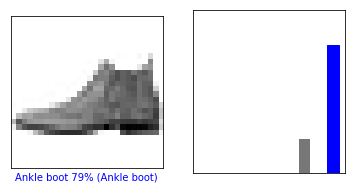

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

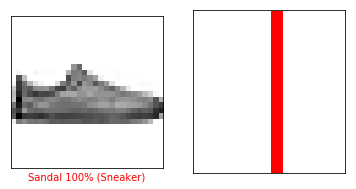

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

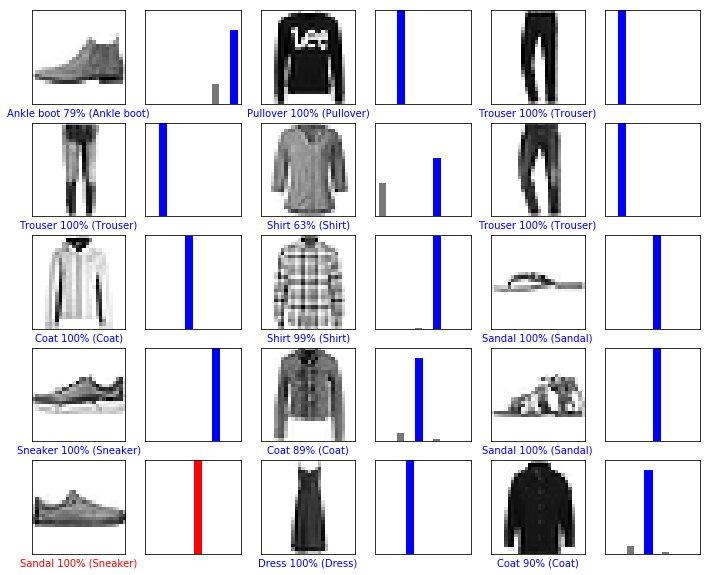

In [42]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [43]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [46]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.1119018e-07 1.3615390e-11 8.4647261e-10 7.3386621e-09 7.9924511e-08
  3.1954630e-03 2.8529684e-07 2.0971720e-01 1.7340315e-06 7.8708494e-01]]


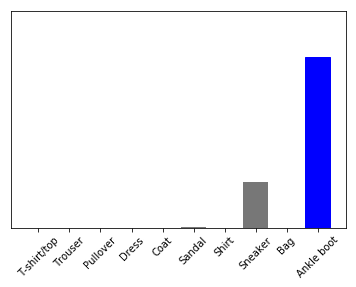

In [47]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [48]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
